# Borrowers Characteristics That Influence the Prosper Loan Amount
## by (Ludmila Mucavele)

## Investigation Overview


For the presentation, I focus on loan original amount count and status, so as the influence of the borrowers in relation to its characteristics. 


## Dataset Overview

This document explores the Prosper Loan dataset that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The last update of the dataset was in 03/11/2014.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# Dta wrangling

# drop duplicated loans from dataset
loan = loan.drop_duplicates(['ListingNumber'])

# drop MonthlyLoanPayment values with null values
loan.drop(loan[loan.MonthlyLoanPayment == 0].index , axis = 0, inplace = True)

# rename variables
loan.rename(columns= {'ListingCategory (numeric)' : 'ListingCategory', 'ProsperRating (numeric)' : 'ProsperRating_numeric',
                     'ProsperRating (Alpha)': 'ProsperRating_alpha'}, inplace = True)

# rename one of the Loan Status value
def replace (x):
    if 'Past' in x:
        return 'PastDue'
    else:
        return x
    
loan['LoanStatus'] = loan['LoanStatus'].apply(lambda x: replace(x))

# change Loan Status data type
order = ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue']
status = pd.api.types.CategoricalDtype(ordered = True, categories = order)
loan['LoanStatus'] = loan['LoanStatus'].astype(status)

# transform object variables into category variables
values = ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired']
cat = pd.api.types.CategoricalDtype(ordered = False, categories = values)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(cat)

## Distribution of Loan Original Amount
The Loan amount is distributed from 1000 (\\$) to 35000 (\\$).
When plotted on a logharitmic scale, the amount distribution looks multimodal with many peaks. Some of them are between 3500  and 6000 (\\$), 6000 and 12000 (\\$), 12000 and 17500 (\\$), and so on; other peaks are below 4000 (\\$).


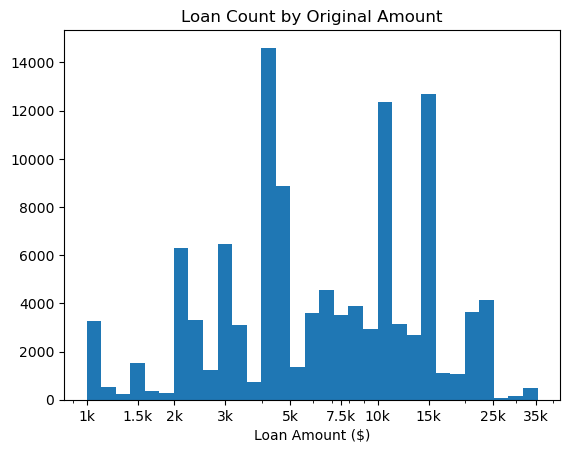

In [4]:
binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+binsize, binsize)


plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 1500, 2000, 3000, 5000, 7500, 10000, 15000, 25000, 35000], 
           ['1k', '1.5k', '2k', '3k', '5k', '7.5k', '10k', '15k', '25k', '35k'])
plt.xlabel('Loan Amount ($)')
plt.title('Loan Count by Original Amount');

## Distribution of Loan Status
Most of the loans were currently being paid in that season, but many of them were completed too. There is a good amount of loans which payment has not been made by its cutoff time (Past Due), and very few loans are in their final payment progress, but only 5 are cancelled.

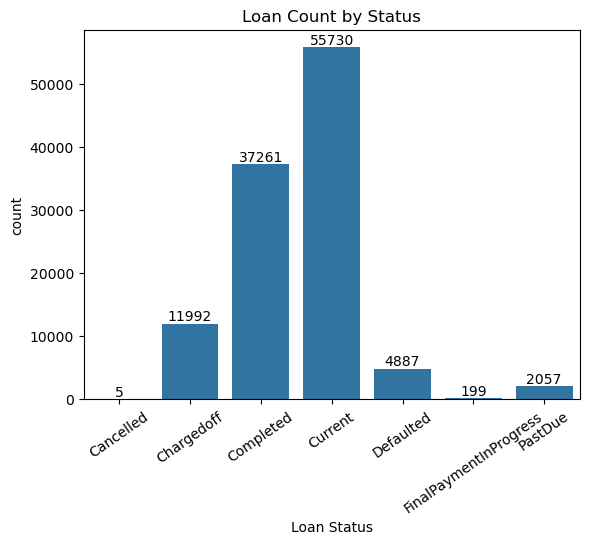

In [5]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = base_color)
plt.xlabel('Loan Status')
plt.xticks(rotation = 35)
plt.title ('Loan Count by Status')

for i in range (len(order)):
    text = sum(loan.LoanStatus == order[i])
    #plt.text(x, y, text, horizontalalignment, verticalalignment)
    plt.text(i, text + 2200, text, ha = 'center', va='top')

## Loan Original Amount vs. Monthly Loan Payment
The Loan Original Amount is highly related to Monthly Loan Payment positively, where most of the distribution is concentrated betweet 0 and 25,000 (\\$) loan original amount. This could mean that the higher the Loan Original Amount, the higher the Monthly Loan Payment gets.

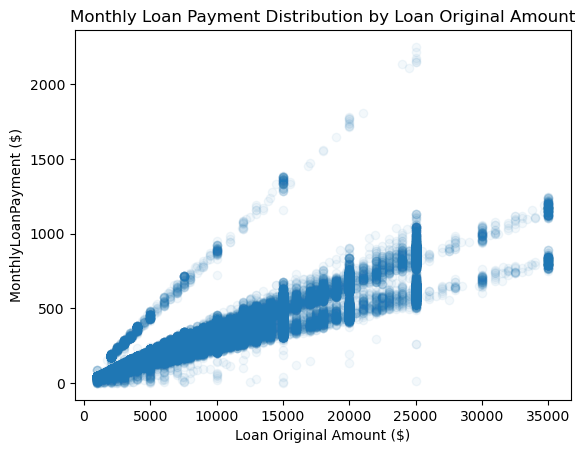

In [6]:
plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', alpha = 1/20)
plt.title('Monthly Loan Payment Distribution by Loan Original Amount')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('MonthlyLoanPayment ($)');

## Loan Original Amount / Stated Monthly Income vs.  Employment Status
* Making a Boxplot for the categorical variables, seems like the borrowers with the highest loan original amount are the Employed, where they can borrow 5000 (\\$) or more.

* The Not Employed borrowers do not have a stated monthly income amount (except for the outliers, that show a high value amount), but their monthly loan payment amount distribution is not the lowest, meaning that they can tend to make loans that require more than 100 (\\$) payment per month.

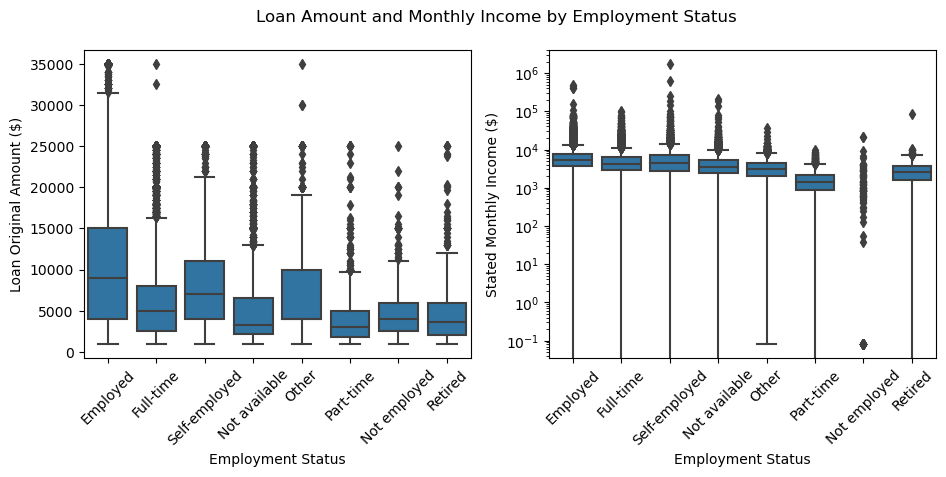

In [12]:
category = loan.query('ListingCategory == [1, 0, 7, 2, 3, 6, 4, 13, 15]')
fig = plt.figure(figsize = [11, 4])

plt.subplot(1, 2, 1)
sb.boxplot(data=category, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation = 45)
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Employment Status')


plt.subplot(1, 2, 2)
sb.boxplot(data=category, x='EmploymentStatus', y='StatedMonthlyIncome', color=base_color)
plt.yscale('log')
plt.xticks(rotation = 45)
plt.ylabel('Stated Monthly Income ($)')
plt.xlabel('Employment Status')

fig.suptitle('Loan Amount and Monthly Income by Employment Status');

## Prosper Payment One Month Later or More by Loan AMount and Employment Status
Besides the Employed borrower being in majority, no matter the loan original amount or the employment status of the borrower, the borrower still can make payments one month later or more. We can see that most of the borrowers do not fail in paying the loan on time too.

The borrowers with a high loan original amount do not tend to make the payment later.

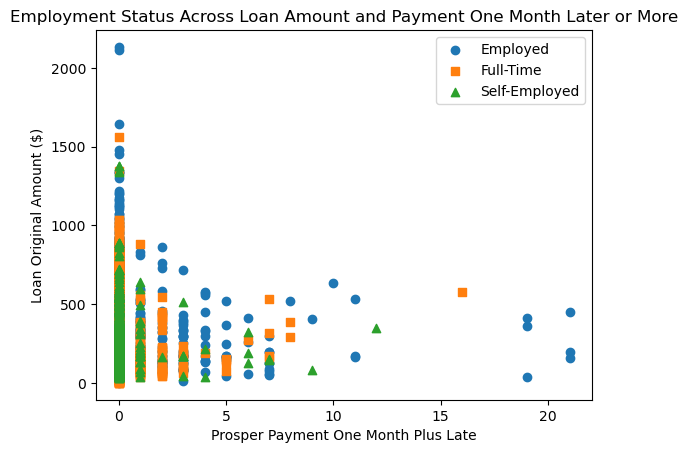

In [8]:
status_markers = [['Employed', 'o'],
                 ['Full-time', 's'],
                 ['Self-employed', '^']]

for status, marker in status_markers:
    loan_status = loan[loan['EmploymentStatus'] == status]
    plt.scatter(data = loan_status, x = 'ProsperPaymentsOneMonthPlusLate', y = 'MonthlyLoanPayment', marker = marker)
plt.legend(['Employed','Full-Time', 'Self-Employed'])
plt.xlabel('Prosper Payment One Month Plus Late')
plt.ylabel('Loan Original Amount ($)')
plt.title('Employment Status Across Loan Amount and Payment One Month Later or More');

### Generate Slideshow
Running the command below to generate the HTML slideshow.

In [13]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 898823 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Anaconda\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Anaconda\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line